<a href="https://colab.research.google.com/github/Maternowsky/Maternowsky/blob/main/Compressing_Data%2C_Dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Feature Extraction**

## **PCA-principal component analysis**

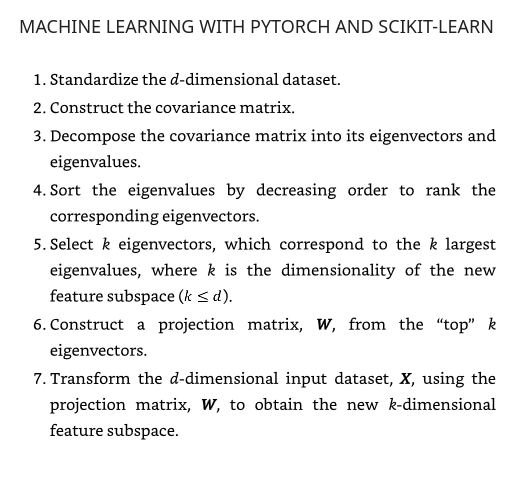

In [3]:
import pandas as pd
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',
                      header = None)


In [4]:
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']


In [5]:
from sklearn.model_selection import train_test_split
X,y = df_wine.iloc[:,1:].values, df_wine.iloc[:,0].values
X_train, X_test, y_train, y_test = \
    train_test_split(X,y, test_size=0.3,
                     stratify = y,
                     random_state = 0)

#standardize the features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

## **Obtain eigen pairs using Numpy**

In [6]:
import numpy as np
cov_mat = np.cov(X_train_std.T) #get covariance matrix
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat) 
print('\nEigenvalues \n', eigen_vals)


Eigenvalues 
 [4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]


## **Plot variance explained ratios**

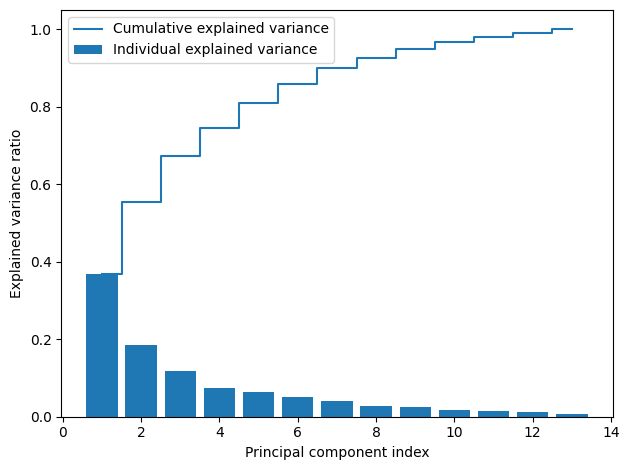

In [7]:
tot = sum(eigen_vals)
var_exp = [(i/tot) for i in 
           sorted(eigen_vals, reverse = True)]
cum_var_exp = np.cumsum(var_exp)
import matplotlib.pyplot as plt
plt.bar(range(1,14), var_exp, align = 'center',
        label = 'Individual explained variance')
plt.step(range(1,14), cum_var_exp, where = 'mid',
         label = 'Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

### **Sort eigenpairs in decreasing order**

In [8]:
#make list of eigenvalue eigenvector tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

#sort the tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse = True)

In [9]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W: \n', w)

Matrix W: 
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


### **Using the projection matrix we can now create a new matrix of two new features x' - xW **

In [10]:
X_train_std[0].dot(w)


array([2.38299011, 0.45458499])

In [11]:
X_train_pca = X_train_std.dot(w)

### **plot transformed dataset thats now a 124x2 matrix**

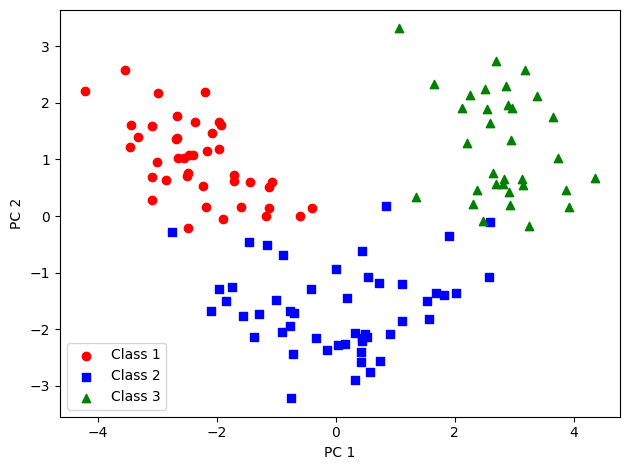

In [12]:
colors = ['r', 'b', 'g']
markers = ['o', 's', '^']

for l, c, m in zip(np.unique(y_train), colors, markers):
  plt.scatter(X_train_pca[y_train==l, 0],
              X_train_pca[y_train==l, 1],
              c=c, label = f'Class {l}', marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()



### ***keep in mind that PCA is unsupervised technique that doesn't use any class label information***

## **PCA using scikit learn**

In [13]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X,y, classifier, test_idx = None, 
                          resolution = 0.02):
  markers = ('o', 's', '^', 'v', '<')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])
  x1_min, x1_max = X[:, 0 ].min() - 1, X[:, 0].max() +1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 0].max() +1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min,x2_max, resolution))
  lab = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
  lab = lab.reshape(xx1.shape)
  plt.contourf(xx1, xx2, lab, alpha = 0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y==cl, 0],
                y=X[y==cl, 1],
                alpha = 0.8,
                c = colors[idx],
                marker = markers[idx], 
                label= f'Class {cl}',
                edgecolor='black')

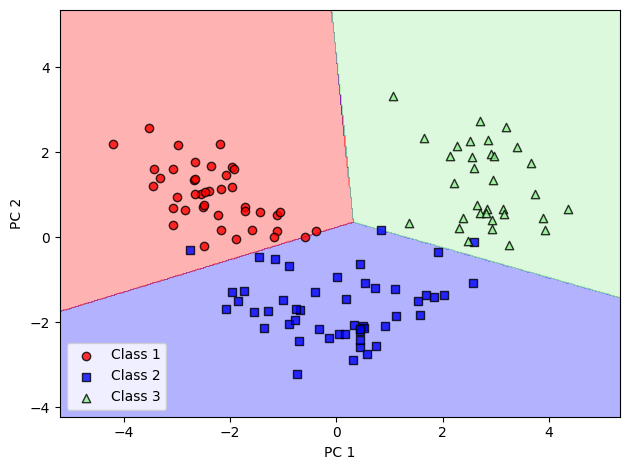

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
lr = LogisticRegression(multi_class = 'ovr',
                        random_state=1,
                        solver = 'lbfgs')
#dimensionality reduction
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
#LR fitting
lr.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc = 'lower left')
plt.tight_layout()
plt.show()

### **Plot decision regions of LR on test dataset**

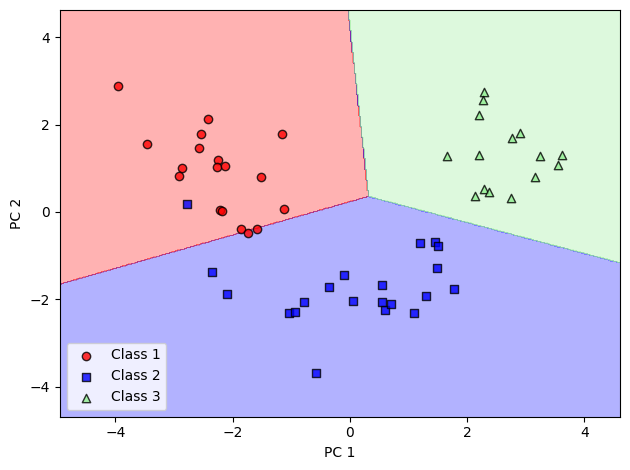

In [15]:
plot_decision_regions(X_test_pca, y_test, classifier = lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc = 'lower left')
plt.tight_layout()
plt.show()

### **Explained Variance Ratios = set n_components = None so all principal components are kept **

In [16]:
pca = PCA(n_components = None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

### **Loadings- correlation between original features and the principal component**

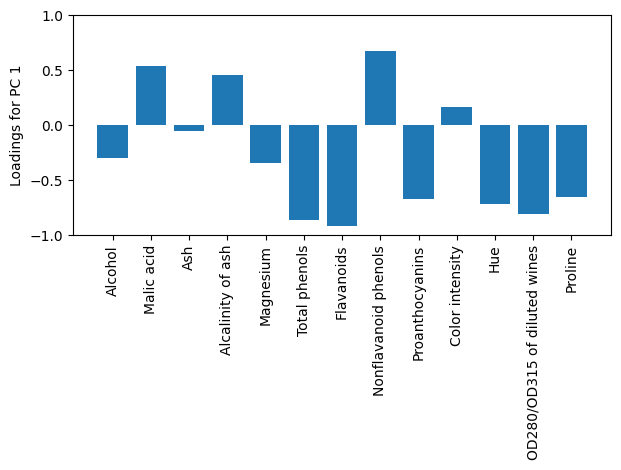

In [17]:
loadings = eigen_vecs * np.sqrt(eigen_vals)

#plot loadings for first principal component

fig, ax = plt.subplots()
ax.bar(range(13), loadings[:,0],
       align = 'center')
ax.set_ylabel('Loadings for PC 1')
ax.set_xticks(range(13))
ax.set_xticklabels(df_wine.columns[1:], rotation = 90)
plt.ylim([-1,1])
plt.tight_layout()
plt.show()

### **we can obtain loadings from fitted scikit learn PCA**

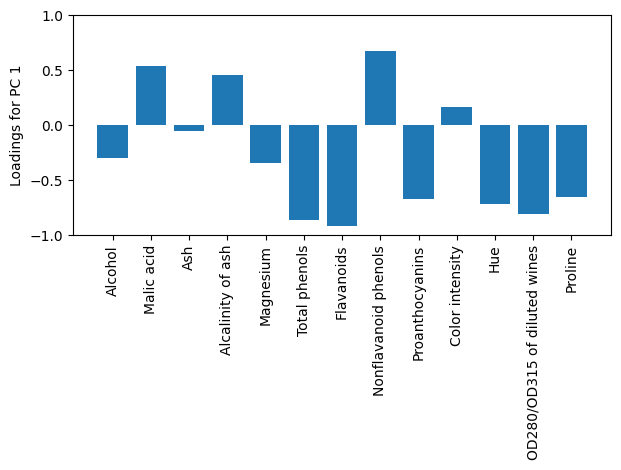

In [18]:
sklearn_loadings = pca.components_.T*np.sqrt(pca.explained_variance_)
fig, ax = plt.subplots()
ax.bar(range(13), sklearn_loadings[:,0], align = 'center')
ax.set_ylabel('Loadings for PC 1')
ax.set_xticks(range(13))
ax.set_xticklabels(df_wine.columns[1:],
                   rotation = 90)
plt.ylim([-1, 1])
plt.tight_layout()
plt.show()

## **LDA- linear discriminant analysis- supervised technique where PCA is unsupervised**

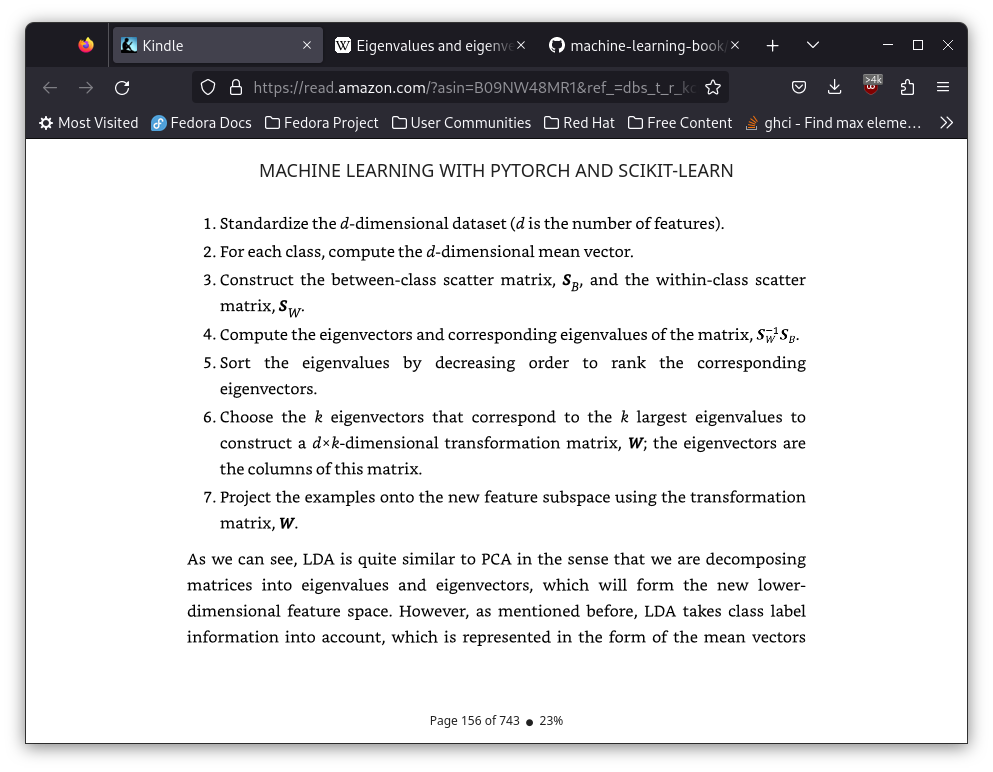

### **Calc mean vectors**

In [19]:
np.set_printoptions(precision=4)
mean_vecs = []
for label in range(1,4):
  mean_vecs.append(np.mean(
      X_train_std[y_train==label], axis =0
  ))
  print(f'MV {label}: {mean_vecs[label -1]}\n')

MV 1: [ 0.9066 -0.3497  0.3201 -0.7189  0.5056  0.8807  0.9589 -0.5516  0.5416
  0.2338  0.5897  0.6563  1.2075]

MV 2: [-0.8749 -0.2848 -0.3735  0.3157 -0.3848 -0.0433  0.0635 -0.0946  0.0703
 -0.8286  0.3144  0.3608 -0.7253]

MV 3: [ 0.1992  0.866   0.1682  0.4148 -0.0451 -1.0286 -1.2876  0.8287 -0.7795
  0.9649 -1.209  -1.3622 -0.4013]



### **Calc within-class scatter matrix**

In [20]:
d = 13 #number of features
S_W = np.zeros((d,d))
for label, mv in zip(range(1,4), mean_vecs):
  class_scatter = np.zeros((d,d))
  for row in X_train_std[y_train==label]:
    row, mv = row.reshape(d,1), mv.reshape(d,1)
    class_scatter += (row - mv).dot((row - mv).T)
    S_W += class_scatter
print('Within-class scatter matrix: ' f'{S_W.shape[0]}x{S_W.shape[1]}')

Within-class scatter matrix: 13x13


In [21]:
print('Class label distribution:', np.bincount(y_train)[1:])

Class label distribution: [41 50 33]


### **Computing the scaled within-class scatter matrix**

In [22]:
d = 13 #number of features
S_W = np.zeros((d,d))
for label, mv in zip(range(1,4), mean_vecs):
  class_scatter = np.cov(X_train_std[y_train == label].T)
  S_W += class_scatter
print('Scaled within-class scatter matrix: ' f'{S_W.shape[0]} x{S_W.shape[1]}')

Scaled within-class scatter matrix: 13 x13


### **Compute between class scatter matrix**

In [23]:
mean_overall = np.mean(X_train_std, axis = 0)
mean_overall = mean_overall.reshape(d,1)
d = 13 # num features
S_B = np.zeros((d,d))
for i, mean_vec in enumerate(mean_vecs):
  n = X_train_std[y_train == i +1, :].shape[0]
  mean_vec=mean_vec.reshape(d,1) # make column vector
  S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)

print('Between-class scatter matrix: ' f'{S_B.shape[0]}x{S_B.shape[1]}')

Between-class scatter matrix: 13x13


In [24]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

### **sort eigenpairs in descending**

In [25]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse = True)
print('Eigenvalues in descending order: \n')
for eigen_val in eigen_pairs:
  print(eigen_val[0])

Eigenvalues in descending order: 

349.61780890599397
172.7615221897938
3.342838214841367e-14
2.842170943040401e-14
2.5545786180111422e-14
1.7533939180734234e-14
1.7533939180734234e-14
1.6579193995960903e-14
1.6579193995960903e-14
8.242524002707225e-15
8.242524002707225e-15
6.36835506006027e-15
2.974634375545734e-15


### **measure how much class-discriminatory info is captures by linear discriminants(eigenvectors)**

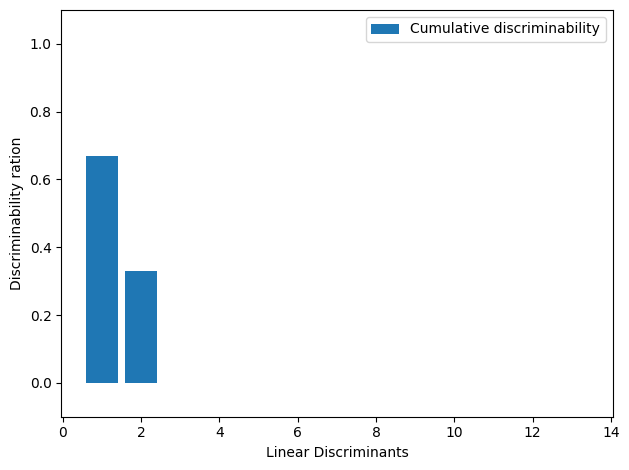

In [26]:
tot = sum(eigen_vals.real)
discr = [(i/tot) for i in sorted(eigen_vals.real, reverse = True)]
cum_discr = np.cumsum(discr)
plt.bar(range(1,14), discr, align='center', 
        label = 'Cumulative discriminability')
plt.ylabel('Discriminability ration')
plt.xlabel('Linear Discriminants')
plt.ylim([-0.1,1.1])
plt.legend(loc= 'best')
plt.tight_layout()
plt.show()

### **Stack two most discriminative eigenvector columns to create transformation matrix**

In [27]:
w = np.hstack((eigen_pairs[0][1][:,np.newaxis].real, 
               eigen_pairs[1][1][:,np.newaxis].real))
print('Matrix W: \n', w)


Matrix W: 
 [[-0.1481 -0.4092]
 [ 0.0908 -0.1577]
 [-0.0168 -0.3537]
 [ 0.1484  0.3223]
 [-0.0163 -0.0817]
 [ 0.1913  0.0842]
 [-0.7338  0.2823]
 [-0.075  -0.0102]
 [ 0.0018  0.0907]
 [ 0.294  -0.2152]
 [-0.0328  0.2747]
 [-0.3547 -0.0124]
 [-0.3915 -0.5958]]


### **Applying the transform matrix to new matrix X' = XW**

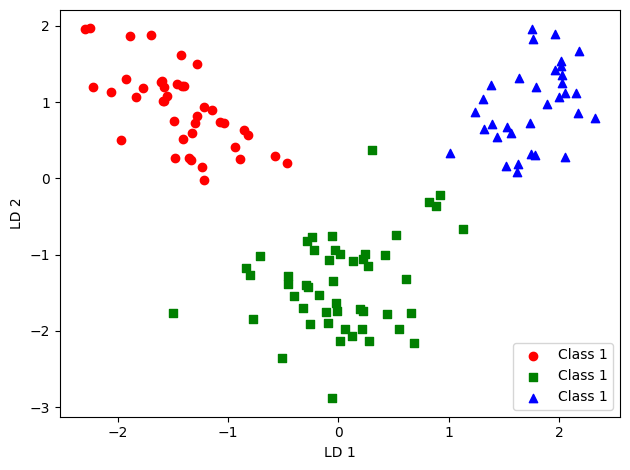

In [28]:
X_train_lda = X_train_std.dot(w)
colors = ['r','g','b']
markers = ['o', 's', '^']
for l, c, m in zip(np.unique(y_train), colors, markers):
  plt.scatter(X_train_lda[y_train==l, 0],
              X_train_lda[y_train==l, 1] * (-1),
              c = c, label = f'Class {1}', marker = m)
  
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc = 'lower right')
plt.tight_layout()
plt.show()

### **LDA via scikit-learn**

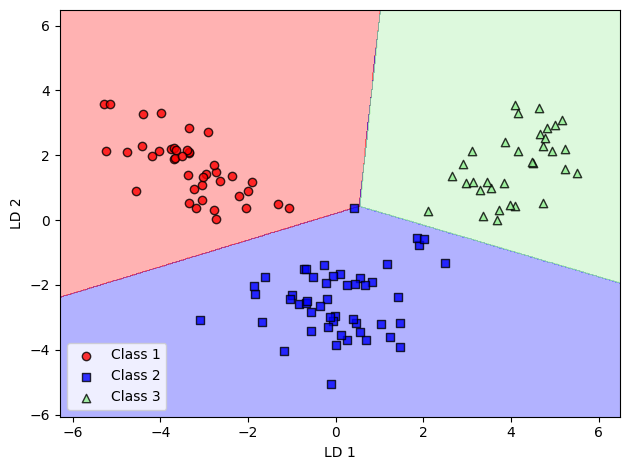

In [29]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
X_train_lda = lda.fit_transform(X_train_std, y_train)
lr = LogisticRegression(multi_class = 'ovr', random_state = 1, 
                        solver = 'lbfgs')
lr = lr.fit(X_train_lda, y_train)
plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

### **look at results on test dataset**

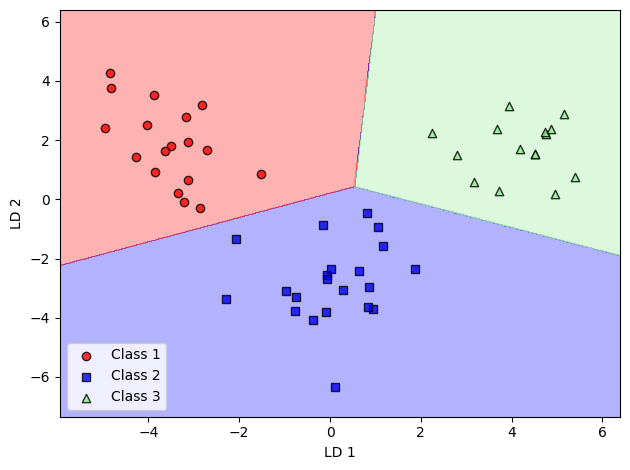

In [30]:
X_test_lda = lda.transform(X_test_std)
plot_decision_regions(X_test_lda, y_test, classifier = lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

# **Non-linear dimensionality reduction**

## **T-distributed stochastic neighbor embedding**

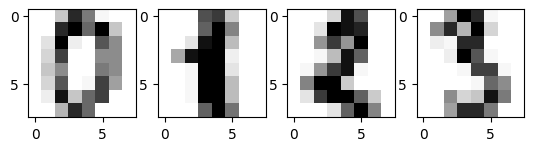

In [31]:
from sklearn.datasets import load_digits
digits = load_digits()

fig, ax = plt.subplots(1,4)
for i in range(4):
  ax[i].imshow(digits.images[i], cmap='Greys')

plt.show()

In [32]:
digits.data.shape

(1797, 64)

In [33]:
y_digits = digits.target
X_digits = digits.data

from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2, init='pca', random_state = 123)
X_digits_tsne = tsne.fit_transform(X_digits)

## **[above] we projected a 64-dimensional dataset onto a 2-dimensional space**

### **Visualize 2D t-SNE**

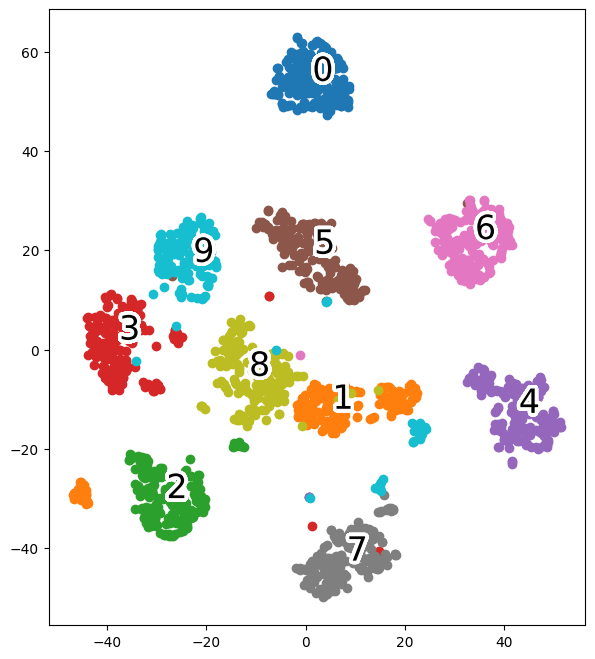

In [34]:
import matplotlib.patheffects as PathEffects
def plot_projection(x, colors):
  f = plt.figure(figsize = (8,8))
  ax = plt.subplot(aspect = 'equal')
  for i in range(10):
    plt.scatter(x[colors == i, 0],
                x[colors == i, 1])
    for i in range(10):
      xtext,ytext = np.median (x[colors == i, :], axis = 0)
      txt = ax.text(xtext, ytext, str(i), fontsize = 24)
      txt.set_path_effects([PathEffects.Stroke(linewidth = 5, foreground = "w"),
                            PathEffects.Normal()])
plot_projection(X_digits_tsne, y_digits)
plt.show()